##  Python으로 한글 워드클라우드(Word Cloud)  생성하고 원하는 이미지 형태로 출력하기

### 1. 필요한 라이브러리 불러오기

In [1]:
# 필요 라이브러리 불러오기
from wordcloud import WordCloud  # 워드클라우드를 생성에 필요한 기본 모듈
import matplotlib.pyplot as plt  # 생성한 워드클라우드 데이터를 시각화
from collections import Counter  # 텍스트를 추출하고, 빈도 수를 추출
from konlpy.tag import Okt       # 한국어를 처리하는 대표적인 형태소 분석 패키지
from PIL import Image            # 워드클라우드를 원하는 형태로 그리기 위해 그림을 불러오는 패키지
import numpy as np               # 불러온 그림을 배열로 나타내어 쉽게 처리할 수 있도록 도와주는 패키지

### 2. konlpy 패키지를 통한 한글 텍스트 추출 및 간단한 전처리

In [2]:
# 2-1 텍스트 파일 불러오기

text = open('대한민국헌법.txt','r', encoding='UTF-8').read()
print(text)

﻿대한민국헌법
[시행 1988. 2. 25] [헌법 제10호, 1987. 10. 29, 전부개정]

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. 
       제1장 총강 
제1조 ①대한민국은 민주공화국이다.
  ②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
제2조 ①대한민국의 국민이 되는 요건은 법률로 정한다.
  ②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
제5조 ①대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
  ②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
제6조 ①헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
  ②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
제7조 ①공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
  ②공무원의 신분과 정치적 중립성은 법률이 정하는 

In [3]:
# 2-2 Okt 형태소 분석기 객체 생성과 명사만 추출

text = open('대한민국헌법.txt','r', encoding='UTF-8').read()

okt = Okt()             # Okt 형태소 분석기 객체를 생성
nouns = okt.nouns(text) # 명사만 추출
print(nouns)

['대한민국', '헌법', '시행', '헌법', '제', '호', '전부', '개정', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '제', '대한민국', '국민', '요건', '법률', '정', '국가', '법률', '정', '바', '재외국민', '보호', '의무', '제', '대한민국', '영토', '한반도', '그', '부속', '도서', '제', '대한민국', '통일', '지향', '자유민주', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '제', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전보장', '국토', '방위', '의무', '수행', '함', '사명', '그', '정치', '중립성', '준수',

In [4]:
# 2-3추출된 단어 중 단어의 길이가 1개인 것은 제외

text = open('대한민국헌법.txt','r', encoding='UTF-8').read()
okt = Okt()             # Okt 형태소 분석기 객체를 생성
nouns = okt.nouns(text) # 명사만 추출

words = []
for n in nouns:
  if len(n) > 1:  # 단어의 길이가 1개인 것은 제외
      words.append(n)        
print(words)


['대한민국', '헌법', '시행', '헌법', '전부', '개정', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민', '보호', '의무', '대한민국', '영토', '한반도', '부속', '도서', '대한민국', '통일', '지향', '자유민주', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전보장', '국토', '방위', '의무', '수행', '사명', '정치', '중립성', '준수', '헌법', '체결', '공포', '조약', '일반', '승인', '국제', '법규', '국내법', '효력', '외국인', '국제', '조약', '지위', '보장', '공무원', '국민', '전체', '대한', '봉

In [5]:
# 2-4 단어 빈도수

text = open('대한민국헌법.txt','r', encoding='UTF-8').read()
okt = Okt()             # Okt 형태소 분석기 객체를 생성
nouns = okt.nouns(text) # 명사만 추출

words = []
for n in nouns:
  if len(n) > 1:  # 단어의 길이가 1개인 것은 제외
      words.append(n)       
        
c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
print(c)

Counter({'법률': 127, '대통령': 83, '국가': 73, '국회': 68, '국민': 61, '헌법': 53, '모든': 37, '기타': 26, '사항': 23, '권리': 21, '의원': 21, '자유': 20, '정부': 20, '선거': 20, '임명': 20, '직무': 19, '국무총리': 19, '경제': 18, '의무': 18, '조직': 18, '국회의원': 18, '임기': 18, '의결': 17, '공무원': 17, '경우': 17, '이상': 17, '국무위원': 17, '대법원': 17, '범위': 16, '법관': 15, '보호': 14, '정책': 14, '정당': 14, '헌법재판소': 14, '재적': 14, '회의': 14, '항의': 14, '관리': 14, '노력': 13, '보장': 13, '거나': 13, '요구': 13, '법원': 12, '집회': 12, '과반수': 12, '출석': 12, '찬성': 12, '대한민국': 11, '시행': 11, '조약': 11, '다만': 11, '재판': 11, '동의': 11, '탄핵': 11, '권한': 11, '안전보장': 10, '공포': 10, '대한': 10, '심판': 10, '재판관': 10, '위원': 10, '정치': 9, '효력': 9, '대하': 9, '체포': 9, '절차': 9, '형사': 9, '근로': 9, '처분': 9, '위원회': 9, '행정각부': 9, '명령': 9, '사회': 8, '질서': 8, '생활': 8, '제정': 8, '인정': 8, '구속': 8, '구성': 8, '확정': 8, '상의': 8, '제출': 8, '국정': 8, '자문': 8, '사무': 8, '개정': 7, '국민투표': 7, '수립': 7, '유지': 7, '이유': 7, '행위': 7, '제한': 7, '기관': 7, '공개': 7, '선출': 7, '국무회의': 7, '대법관': 7, '지방자치단체': 7, '최초': 7, '민주': 6,

## 3. 한글로 워드클라우드 시각화

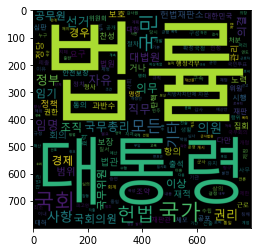

In [6]:
# 3-1 워드클라우드 시각화

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
               width=400,
               height=400, 
               scale=2.0,
               max_font_size=250)

gen = wc.generate_from_frequencies(c)  #generate_from_frequencies 단어의 빈도수를 이용하여 워드 클라우드를 그림
plt.imshow(gen)

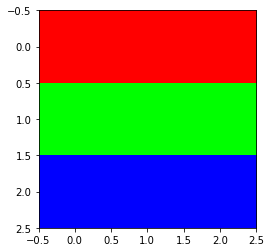

In [7]:
import numpy as np
from matplotlib import pyplot as plt

m=np.array(

[

     [[255,0,0],[255,0,0],[255,0,0]],

     [[0,255,0],[0,255,0],[0,255,0]],

     [[0,0,255],[0,0,255],[0,0,255]],
   ])

plt.imshow(m)
plt.show()

In [8]:
# 3-2 원하는 이미지 불러오기
img = Image.open('image/hsu_mask.png') #Image.open 함수를 통해 이미지를 불러오기 
img_array = np.array(img)

print(img_array)   # 255가 하얀색 영역, 0이 검은색 영역

[[[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 ...

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]]


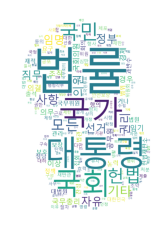

In [9]:
img = Image.open('image/hsu_mask.png') #Image.open 함수를 통해 이미지를 불러오기 
img_array = np.array(img)

wc = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
               background_color="white",
               width=400, 
               height=400, 
               scale=2.0, 
               max_font_size=250, 
               mask=img_array)     #mask에 넣기

gen = wc.generate_from_frequencies(c)
plt.axis('off')  
plt.imshow(gen)
plt.show()

In [10]:
## 이미지로 저장하기
wc.to_file('법전_워드클라우드.png')